In [28]:
print("\nThis project aims to predict traffic congestion by implementing a machine learning pipeline\nusing two different regression models: Random Forest Regressor (RFR) and Support Vector Regression (SVR).")

# Guidelines for running the program:
print("\nGuidelines:")
print("1. Ensure that the 'Dataset.csv' file is in the correct path or update the file path accordingly.")
print("2. Check for missing values in the dataset and handle them appropriately.")
print("3. The 'Date' column is assumed to be in datetime format.")
print("4. Adjust the features list based on your analysis in the 'Feature Selection' section.")
print("5. RFR and SVR models are used with default hyperparameters.")
print("6. Adjust the parameters of the both models based on your analysis or use the default values.")
print("7. Interpret the visualizations to understand the model predictions. \n")


This project aims to predict traffic congestion by implementing a machine learning pipeline
using two different regression models: Random Forest Regressor (RFR) and Support Vector Regression (SVR).

Guidelines:
1. Ensure that the 'Dataset.csv' file is in the correct path or update the file path accordingly.
2. Check for missing values in the dataset and handle them appropriately.
3. The 'Date' column is assumed to be in datetime format.
4. Adjust the features list based on your analysis in the 'Feature Selection' section.
5. RFR and SVR models are used with default hyperparameters.
6. Adjust the parameters of the both models based on your analysis or use the default values.
7. Interpret the visualizations to understand the model predictions. 



In [29]:
# Essential libraries for building and evaluating machine learning models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
# Load the dataset
df = pd.read_csv("Dataset.csv")

# Display the first few rows of the dataset
print("\nDataset Content:")
print(df.head())


Dataset Content:
         Day      Date  CodedDay  Zone  Weather  Temperature  Traffic
0  Wednesday  1/6/2018         3     2       35           17        2
1  Wednesday  1/6/2018         3     3       36           16        3
2  Wednesday  1/6/2018         3     4       27           25        5
3  Wednesday  1/6/2018         3     5       23           23        3
4  Wednesday  1/6/2018         3     6       18           42        2


In [31]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("\nMissing Values:")
print(missing_values)


Missing Values:
Day            0
Date           0
CodedDay       0
Zone           0
Weather        0
Temperature    0
Traffic        0
dtype: int64


In [32]:
# Basic statistics of the dataset
print(df.describe())

          CodedDay         Zone      Weather  Temperature      Traffic
count  1439.000000  1439.000000  1439.000000  1439.000000  1439.000000
mean      4.000695    72.549687    23.886032    25.011119     3.031967
std       1.733054    41.554330    13.576787    11.325376     1.429018
min       1.000000     1.000000     0.000000     6.000000     1.000000
25%       3.000000    37.000000    12.000000    15.000000     2.000000
50%       4.000000    73.000000    24.000000    25.000000     3.000000
75%       5.000000   108.500000    35.000000    35.000000     4.000000
max       7.000000   144.000000    47.000000    45.000000     5.000000


In [33]:
# Data Preprocessing
# Assuming 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day_name()
df['CodedDay'] = df['Day'].map({'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7})
# One-hot encoding for 'Day'
df = pd.get_dummies(df, columns=['Day'], drop_first=True)

In [34]:
# Feature Selection
features = ['CodedDay', 'Zone', 'Weather', 'Temperature']
X = df[features]
y = df['Traffic']

In [35]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
# Model 1: RandomForestRegressor with parameter adjustments
rf_model = RandomForestRegressor(n_estimators=100, 
                                 max_depth=None,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 max_features='auto',
                                 random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [37]:
# Model 2: SVR with parameter adjustments
svr_model = SVR(kernel='rbf', C=0.1, gamma='scale')
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)

In [38]:
# Mean Absolute Error (MAE) for RandomForestRegressor
rf_mae = mean_absolute_error(y_test, rf_predictions)
print(f'\nRFR Mean Absolute Error: {round(rf_mae, 4)}')

# Mean Absolute Error (MAE) for SVR
svr_mae = mean_absolute_error(y_test, svr_predictions)
print(f'\nSVR Mean Absolute Error: {round(svr_mae, 4)}')


RFR Mean Absolute Error: 1.2539

SVR Mean Absolute Error: 1.2217


In [39]:
# Calculate the mean of feature variables row by row
feature_means = X_test.mean(axis=1)

In [40]:
# Print the test data and corresponding predicted data for RandomForestRegressor 
print("\nRFR - Test Data vs Predicted Data:")
print("Feature means | Actual Traffic | Predicted Traffic")
for temp, actual, predicted in zip(feature_means[:10], y_test[:10], rf_predictions[:10]):
    print(f"{temp:.2f} | {actual:.2f} | {predicted:.2f}")

# Print a separator line
print("-" * 50)

# Print the test data and corresponding predicted data for SVR
print("SVR - Test Data vs Predicted Data:")
print("Feature means | Actual Traffic | Predicted Traffic")
for temp, actual, predicted in zip(feature_means[:10], y_test[:10], svr_predictions[:10]):
    print(f"{temp:.2f} | {actual:.2f} | {predicted:.2f}")


RFR - Test Data vs Predicted Data:
Feature means | Actual Traffic | Predicted Traffic
18.00 | 2.00 | 3.02
25.50 | 2.00 | 3.10
41.75 | 5.00 | 2.35
35.75 | 1.00 | 2.33
22.75 | 3.00 | 2.92
49.75 | 5.00 | 3.26
38.75 | 4.00 | 2.68
47.25 | 3.00 | 3.14
27.00 | 2.00 | 2.78
45.25 | 2.00 | 2.37
--------------------------------------------------
SVR - Test Data vs Predicted Data:
Feature means | Actual Traffic | Predicted Traffic
18.00 | 2.00 | 2.97
25.50 | 2.00 | 2.98
41.75 | 5.00 | 2.95
35.75 | 1.00 | 3.06
22.75 | 3.00 | 3.11
49.75 | 5.00 | 2.90
38.75 | 4.00 | 3.12
47.25 | 3.00 | 2.90
27.00 | 2.00 | 3.04
45.25 | 2.00 | 3.01


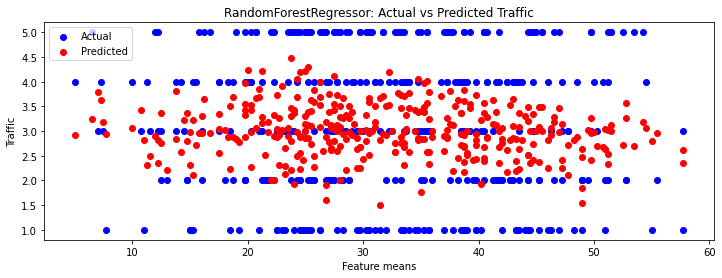

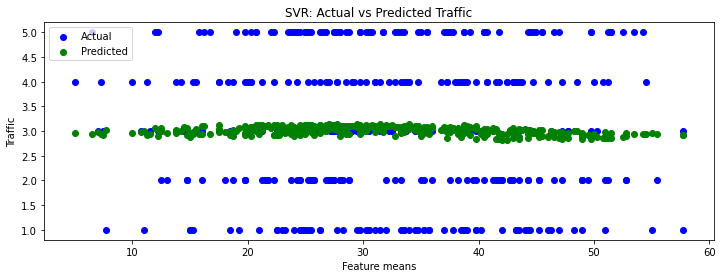

In [41]:
# Visualize actual vs predicted values for RandomForestRegressor
plt.figure(figsize=(12, 4))
plt.scatter(feature_means, y_test, color='blue', label='Actual')
plt.scatter(feature_means, rf_predictions, color='red', label='Predicted')
plt.title('RandomForestRegressor: Actual vs Predicted Traffic')
plt.xlabel('Feature means')
plt.ylabel('Traffic')
plt.legend()
plt.show()

# Visualize actual vs predicted values for SVR
plt.figure(figsize=(12, 4))
plt.scatter(feature_means, y_test, color='blue', label='Actual')
plt.scatter(feature_means, svr_predictions, color='green', label='Predicted')
plt.title('SVR: Actual vs Predicted Traffic')
plt.xlabel('Feature means')
plt.ylabel('Traffic')
plt.legend() 
plt.show()

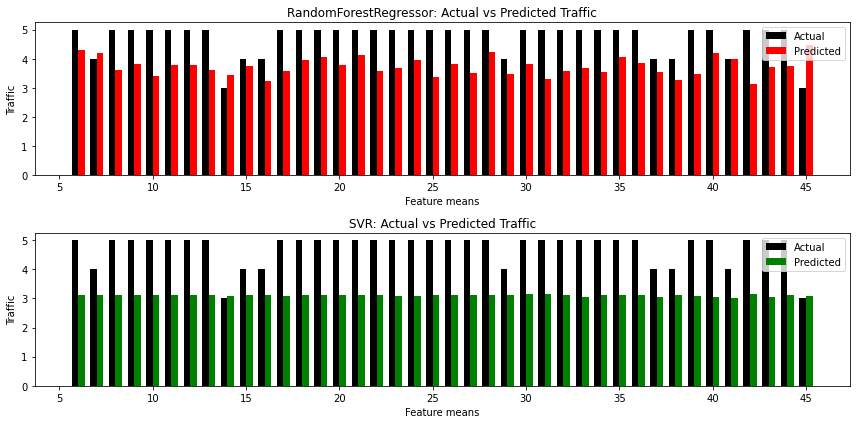

In [42]:
# Visualize using another plt type - Bar
# Visualize actual vs predicted values for RandomForestRegressor
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
bar_width = 0.35
plt.bar(X_test['Temperature'] - bar_width/2, y_test, color='black', width=bar_width, label='Actual')
plt.bar(X_test['Temperature'] + bar_width/2, rf_predictions, color='red', width=bar_width, label='Predicted')
plt.title('RandomForestRegressor: Actual vs Predicted Traffic')
plt.xlabel('Feature means')
plt.ylabel('Traffic')
plt.legend()

# Visualize actual vs predicted values for SVR
plt.subplot(2, 1, 2)
plt.bar(X_test['Temperature'] - bar_width/2, y_test, color='black', width=bar_width, label='Actual')
plt.bar(X_test['Temperature'] + bar_width/2, svr_predictions, color='green', width=bar_width, label='Predicted')
plt.title('SVR: Actual vs Predicted Traffic')
plt.xlabel('Feature means')
plt.ylabel('Traffic')
plt.legend() 

plt.tight_layout()
plt.show()